# Rubric

|평가문항|	상세기준|내 평가|
|--|--|--|
|1. 시계열의 안정성이 충분히 확인되었는가?|플로팅과 adfuller 메소드 사용으로 시계열의 안정성이 (충분히) 확인되는 것을 시각화하였으며,</br> 이에 대한 충분한 설명(해당 메소드에 대한 이해)이 서술되어있음|Done|
|2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?|p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨|Done|
|3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?|3개 이상 종목이 MAPE 15% 미만의 정확도로 예측됨|Done|

# LGEnsol

##1-1 Import Data
- 종가 Close만 사용
- 데이터 프레임을 시리즈로

In [ ]:
#!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams



In [ ]:
import yfinance as yf
# path = '/content/drive/MyDrive/Colab Notebooks/aiffel/Time_series(7주차)/'
df1 = yf.download('373220.KS',start = '2022-01-27')
df1 # 구지 저장하지 않고 처리하자 마운트 많이 귀찮고 인덱스 바꾸지 않아도 되고 그런데 데이터의 안정성 때문에 저장해야 한다고 하니  이번만 이렇게...
# df.to_csv(path + 'lgensol.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-27,597000.0,598000.0,450000.0,505000.0,505000.0,15946992
2022-01-28,476000.0,483000.0,445000.0,450000.0,450000.0,4559773
2022-02-03,458000.0,495500.0,441000.0,477000.0,477000.0,2918435
2022-02-04,476500.0,505000.0,476000.0,504000.0,504000.0,2088996
2022-02-07,520000.0,548000.0,511000.0,548000.0,548000.0,1911176
...,...,...,...,...,...,...
2023-04-10,587000.0,598000.0,584000.0,596000.0,596000.0,597900
2023-04-11,600000.0,613000.0,596000.0,610000.0,610000.0,811886
2023-04-12,608000.0,610000.0,588000.0,590000.0,590000.0,541299


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/Colab Notebooks/aiffel/Time_series(7주차)/'
# df1 = pd.read_csv(path+'lgensol.csv', index_col = 'Date', parse_dates = True)
# df1

In [ ]:
# path = '/content/drive/MyDrive/Colab Notebooks/aiffel/Time_series(7주차)/'
# df1 = pd.read_csv(path+'lgensol.csv', index_col = 'Date', parse_dates = True)
ts1 = df1['Close']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
2022-01-27    505000.0
2022-01-28    450000.0
2022-02-03    477000.0
2022-02-04    504000.0
2022-02-07    548000.0
Name: Close, dtype: float64

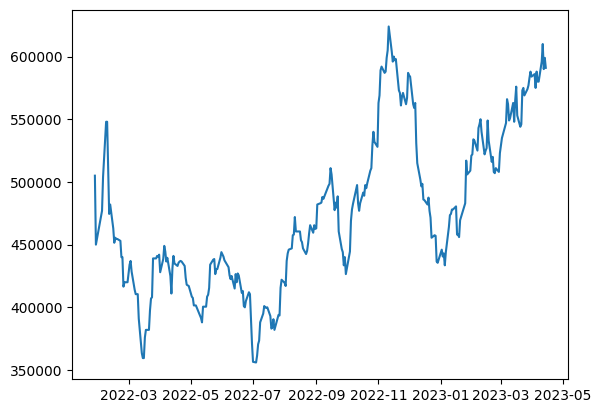

In [ ]:
plt.plot(ts1)

##1-2 Preprocessing

In [ ]:
# 결측치 처리
ts1[ts1.isna()]
# 없음

Series([], Name: Close, dtype: float64)

Date
2022-01-27    13.132314
2022-01-28    13.017003
2022-02-03    13.075272
2022-02-04    13.130332
2022-02-07    13.214031
                ...    
2023-04-10    13.297996
2023-04-11    13.321214
2023-04-12    13.287878
2023-04-13    13.303017
2023-04-14    13.289571
Name: Close, Length: 299, dtype: float64

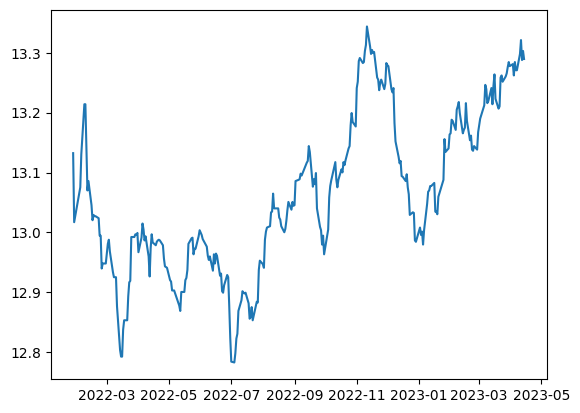

In [ ]:
#로그함수 변환
ts1_log = np.log(ts1)
plt.plot(ts1_log)
ts1_log

##1-3 ADF test 등
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [ ]:
# 데이터를 구간으로 잘라서 시각화

def plot_rolling_statistics(timeseries, window=12): #window 값을 얼마를 해야 적당할까?
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('<3')

<3


In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('<3')

<3


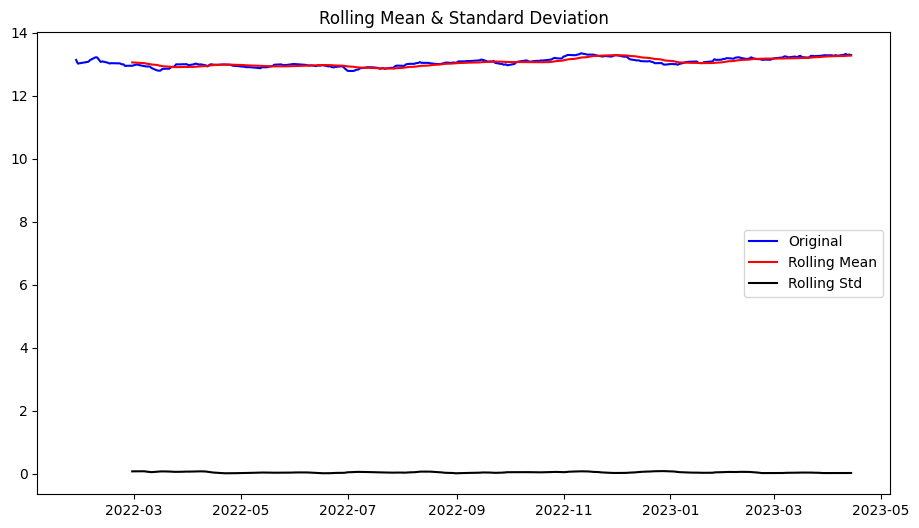

Results of Dickey-Fuller Test:
Test Statistic                  -1.426184
p-value                          0.569661
#Lags Used                       1.000000
Number of Observations Used    297.000000
Critical Value (1%)             -3.452561
Critical Value (5%)             -2.871321
Critical Value (10%)            -2.571982
dtype: float64


In [ ]:
# 정성적 그래프 분석
plot_rolling_statistics(ts1_log, window=20)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts1_log)  
# p-value 가 0.5가 넘었다. non-stationary 정상화가 필요하다는 말

Results of Dickey-Fuller Test:
Test Statistic                -7.881270e+00
p-value                        4.695853e-12
#Lags Used                     1.600000e+01
Number of Observations Used    2.800000e+02
Critical Value (1%)           -3.453922e+00
Critical Value (5%)           -2.871918e+00
Critical Value (10%)          -2.572300e+00
dtype: float64


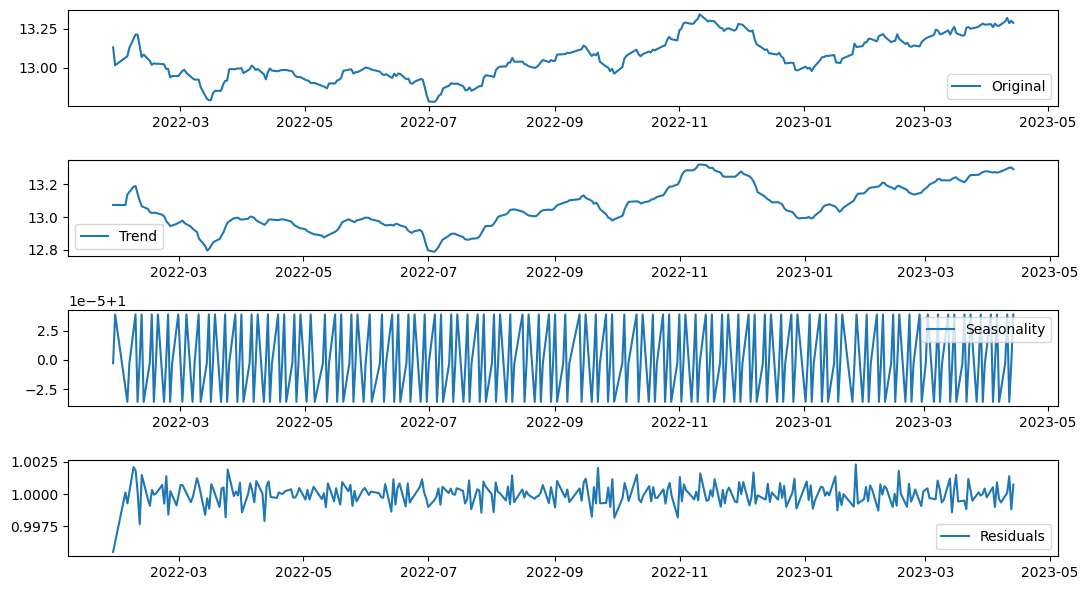

In [ ]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(ts1_log, model='multiplicative', period = 3)   # 2~30 까지 period를 넣어봤더니 2,3일 때 확실히 residual 그래프가 white noise 같이 보임.

trend1 = decomposition1.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal1 = decomposition1.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual1 = decomposition1.resid # 원본(로그변환한) - 추세 - 계절성 = white noise  => 이거 가지고 학습을 해도... 시간 나면 하고 아니면 안할 거야...

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual1, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#정량적 Augmented Dicky-Fuller Test
residual1.dropna(inplace=True)
augmented_dickey_fuller_test(residual1)
#오잉 p-value가 많이 낮아졌네 로그만 하면 안되고 계절성, 추세도 다 빼주니 stationary..

##1-4 Split

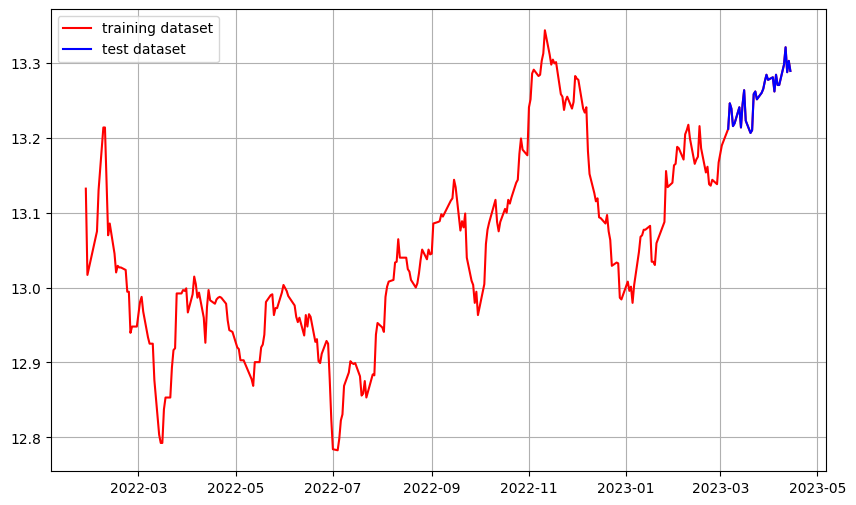

In [ ]:
train1_data, test1_data = ts1_log[:int(len(ts1_log)*0.9)], ts1_log[int(len(ts1_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts1_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test1_data, c='b', label='test dataset')
plt.legend()

##1-5 ARIMA parameter

###1-5-1 Determine p,d,q with graph
이들 중 p 와 q 는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데,   
이는 p 나 q 중 하나는 0이라는 뜻입니다.  
이렇게 하는 이유는 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문입니다.

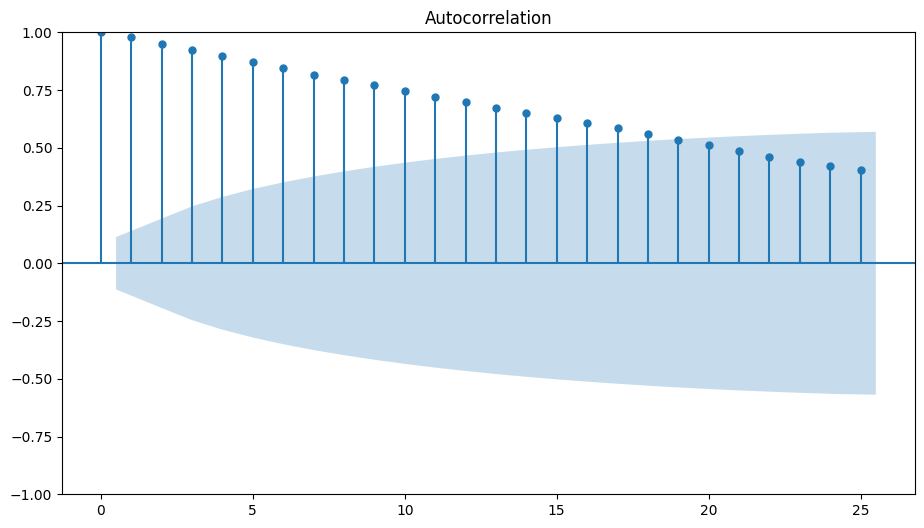

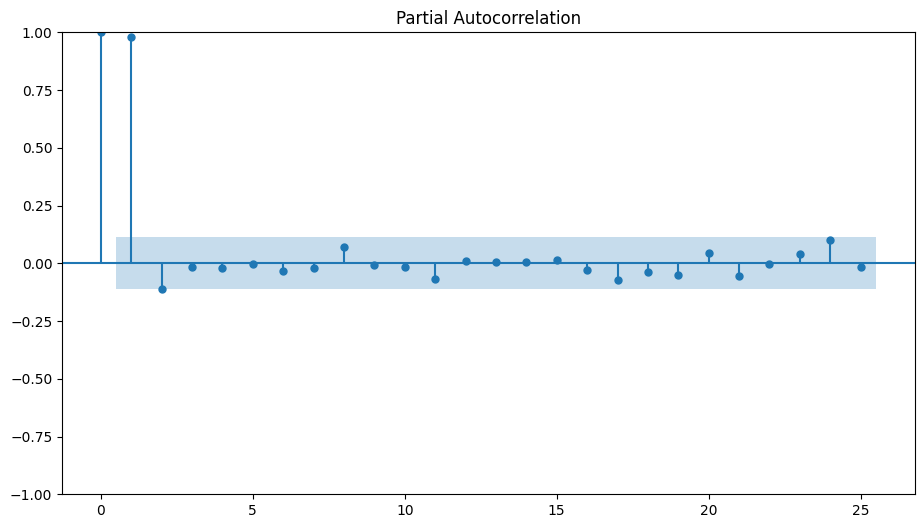

In [ ]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts1_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts1_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()
#ACF는 완만하게 감소, non-stationary 
#PACF는 lag 1 이후에 급격히 떨어지므로 AR만 p=1 그럼 q=0

Results of Dickey-Fuller Test:
Test Statistic                -1.558063e+01
p-value                        1.934690e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.970000e+02
Critical Value (1%)           -3.452561e+00
Critical Value (5%)           -2.871321e+00
Critical Value (10%)          -2.571982e+00
dtype: float64


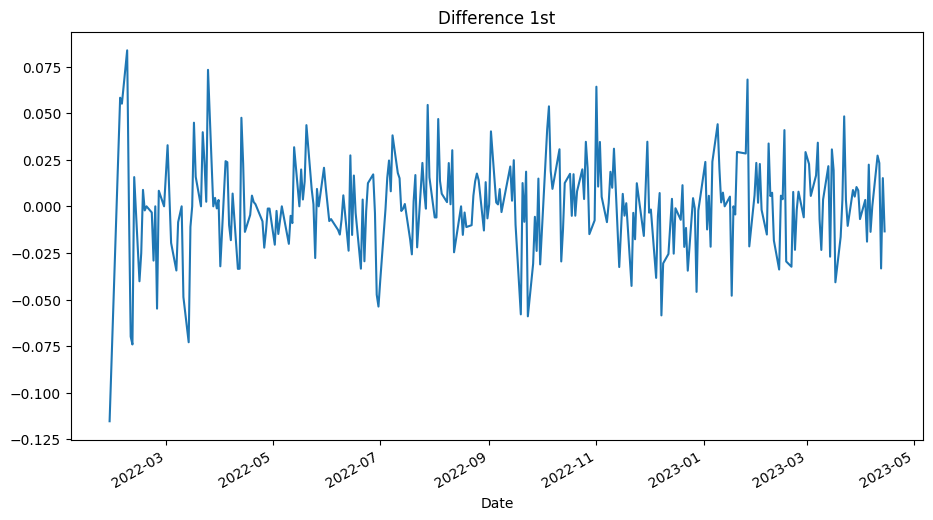

In [ ]:
# 1차 차분 구하기
diff1_1 = ts1_log.diff(periods=1).iloc[1:]
diff1_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff1_1)



#1차만 해도 되겠음.

Results of Dickey-Fuller Test:
Test Statistic                -7.910946e+00
p-value                        3.949619e-12
#Lags Used                     1.600000e+01
Number of Observations Used    2.800000e+02
Critical Value (1%)           -3.453922e+00
Critical Value (5%)           -2.871918e+00
Critical Value (10%)          -2.572300e+00
dtype: float64


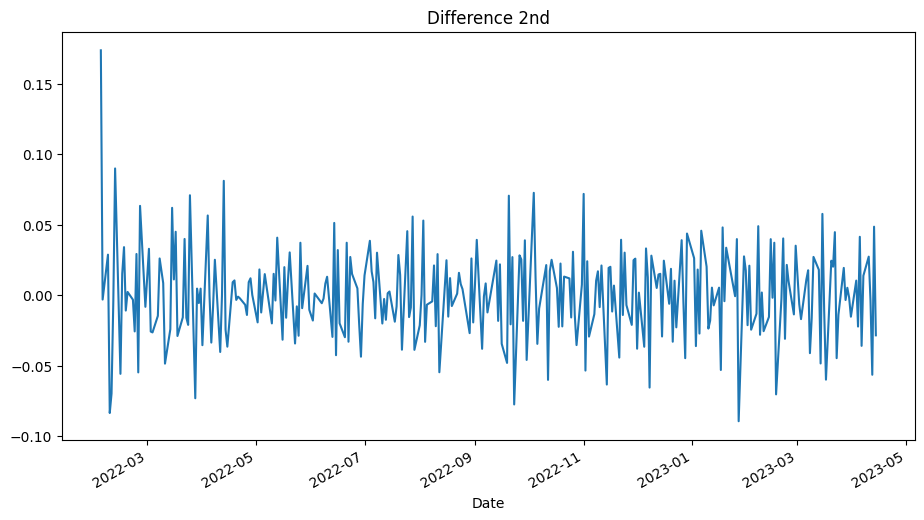

In [ ]:
# 2차 차분 구하기
diff1_2 = diff1_1.diff(periods=1).iloc[1:]
diff1_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff1_2)

- p,d,q 구하기
    - 앞에서 PACF 그래프에서 lag 1 이후 값이 급격히 감소하여 p=1
    - 보통 p*q = 0이라 하였으니 q=0
    - 1차 차분을 하였더니 p value가 충분히 작으므로 d=1

###1-5-2 Determine p,d,q with autoARIMA

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.5/920.5 kB 17.4 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.2 MB/s eta 0:00:00


In [ ]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12  SARIMA
# 시즈널이 나왔다고 차분을 수동으로 하지 않고 모델에서 직접할 수 있군 여기서 1번만 했는데 대부분 1번만 하면 충분...
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm # Auto ARIMA 모델
model1 = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 3) #seasonal이 있으므로 true, seasonal_decompesse 할 때 period =3 에서 residual이 잡음처럼 나와서 max_D = 3을 넣었음. 그렇지만 AIC에 상관없음. 뭐지?
res1 = model1.fit(train1_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1206.692, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1201.097, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1206.085, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1205.790, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1203.074, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1202.126, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1202.087, Time=1.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1199.789, Time=1.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1199.407, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1204.084, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1201.466, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1201.756, Time=1.01 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1198.240, Time=1.28 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1208.632, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0

- determine p,d,q

||with graph|with autoARIMA|
|--|--|--|
|p,d,q|1,1,0|2,1,2|

AR 과 MR  둘 중의 하나의 특징만 가진다고 했는데 autoarima에서는 p,q에 다 값을 넣었다. 무슨 의미일까?  
일단 arima 모델 성능을 보자..
그리고 데이터를 받을 때  end 값을 안넣었더니 매일 새롭게 업데이트가 되네.. 그래서 값이 맨날 달려져 ㅜ.ㅜㅜ

##1-6 Learning

###1-6-1 ARIMA (1,1,0) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model1 = ARIMA(train1_data, order=(1, 1, 0)) # 모수는 이전 그래프를 참고 
fitted1_m = model1.fit() 

print(fitted1_m.summary())

# Ljung-Box 는 잔차가 백색 잡음인지 검정하는 통계량인데 
#그것의 통계값이 0.99 (귀무가설 : 잔차가 백색잡음 시계열을 따른다.) 이므로 기각하지 못함. 
# 즉, 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기 상관을 가지지 않는 백색 잡음임.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  269
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 606.020
Date:                Fri, 14 Apr 2023   AIC                          -1208.041
Time:                        02:19:44   BIC                          -1200.859
Sample:                             0   HQIC                         -1205.156
                                - 269                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1547      0.046      3.382      0.001       0.065       0.244
sigma2         0.0006   3.93e-05     16.158      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


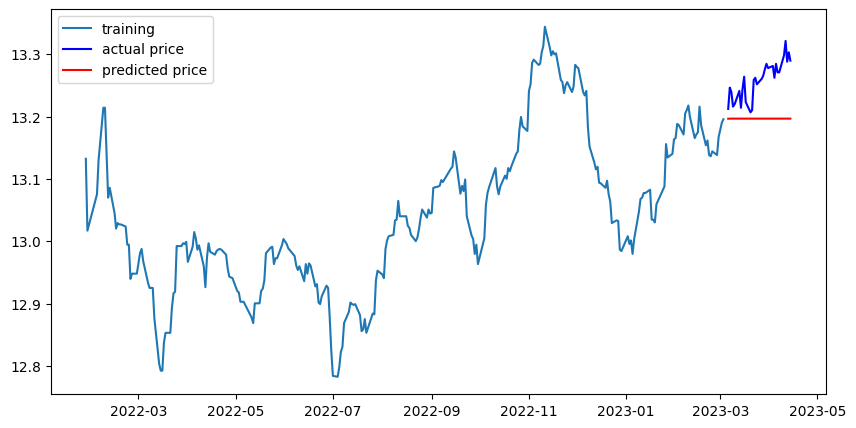

In [ ]:
fc = fitted1_m.forecast(len(test1_data), alpha=0.05) # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test1_data.index) # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train1_data, label='training')
plt.plot(test1_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test1_data), np.exp(fc)) #전처리에서 로그값을 했기 때문에 로그 벗김.
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test1_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test1_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test1_data))/np.abs(np.exp(test1_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1476888367.9524064
MAE:  34385.774754445025
RMSE:  38430.305332542004
MAPE: 5.92%


### Extra work  
    데이터가 없는 미래를 예측하려고 했는데 쓸데없는 짓이었음.   
    아무 의미 없음. 확인할 수 없어 평가는 미래에...  

In [ ]:
!pip install exchange_calendars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


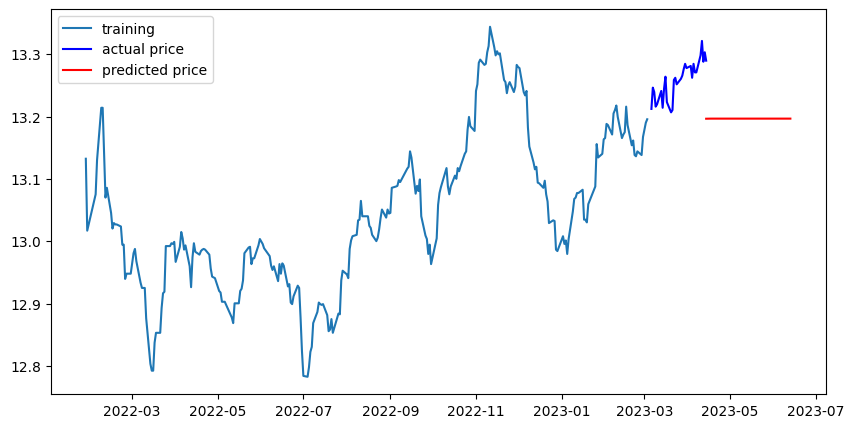

In [ ]:
#주식개장일 불러오는 함수 생성
import exchange_calendars as ecals
def get_open_dates(start,end):
    k = ecals.get_calendar("XKRX")
    df = pd.DataFrame(k.schedule.loc[start:end]) 
    # print(df['open'])
    date_list = []
    for i in df['open']:
        date_list.append(i.strftime("%Y-%m-%d"))
       # print(i.strftime("%Y-%m-%d"))   
    date_index = pd.DatetimeIndex(date_list)
    return date_index  # DatetimeIndex
    
#향후 1년 주가 예측
date_index = get_open_dates("2023-04-14","2023-06-13")

fc = fitted1_m.forecast(len(date_index), alpha=0.05) # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=date_index) # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train1_data, label='training')
plt.plot(test1_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

##1-6-2 ARIMA (2,1,2) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model1 = ARIMA(train1_data, order=(2, 1, 2)) # 모수는 이전 그래프를 참고 
fitted1_m = model1.fit() 

print(fitted1_m.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  269
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 609.316
Date:                Fri, 14 Apr 2023   AIC                          -1208.632
Time:                        02:20:14   BIC                          -1190.677
Sample:                             0   HQIC                         -1201.420
                                - 269                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1806      0.191      0.947      0.343      -0.193       0.554
ar.L2         -0.6620      0.134     -4.954      0.000      -0.924      -0.400
ma.L1         -0.0100      0.192     -0.052      0.9

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


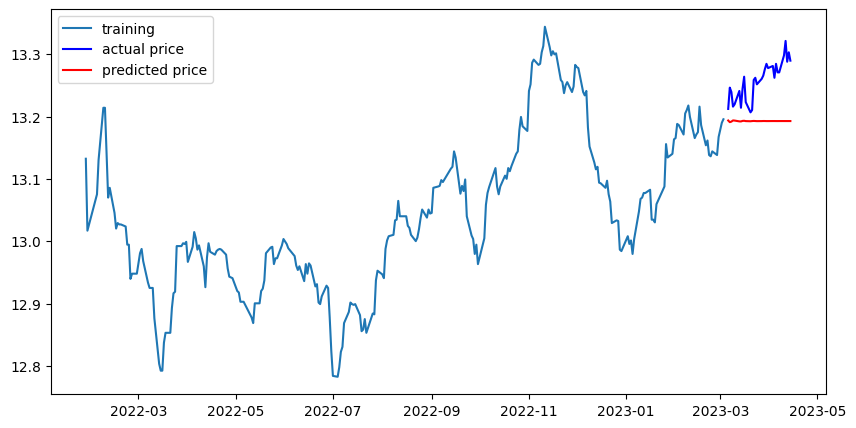

In [ ]:
fc = fitted1_m.forecast(len(test1_data), alpha=0.05) # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test1_data.index) # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train1_data, label='training')
plt.plot(test1_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test1_data), np.exp(fc)) #전처리에서 로그값을 했기 때문에 로그 벗김.
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test1_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test1_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test1_data))/np.abs(np.exp(test1_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1626819830.9665806
MAE:  36492.410843383725
RMSE:  40333.85465048662
MAPE: 6.28%


##1-7 Summary
- p,d,q

||with graph|with autoARIMA|
|--|--|--|
|p,d,q|1,1,0|2,1,2|
|AIC|-1208.041|-1208.632|
|MAPE(%)|5.92|6.28|

- p,d,q 가 autoarima을 통해 얻은 값으로 학습한 것이 더 안좋아..
- AIC가 제일 작은 것을 고른 것인데 미묘한 차이는 학습에서 뒤집어 질 수 있는 거구나.. 

# TSLA

##2-1 Import Data
- 종가 Close만 사용
- 데이터 프레임을 시리즈로

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams



In [ ]:
!pip install yfinance --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

df2 = yf.download('TSLA', start = '2022-04-01')

print(type(df2))
df2

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-01,360.383331,364.916656,355.546661,361.529999,361.529999,54263100
2022-04-04,363.126678,383.303345,357.510010,381.816681,381.816681,82035900
2022-04-05,378.766663,384.290009,362.433319,363.753326,363.753326,80075100
2022-04-06,357.823334,359.666656,342.566681,348.586670,348.586670,89348400
2022-04-07,350.796661,358.863342,340.513336,352.420013,352.420013,79447200
...,...,...,...,...,...,...
2023-04-06,183.080002,186.389999,179.740005,185.059998,185.059998,123857900
2023-04-10,179.940002,185.100006,176.110001,184.509995,184.509995,142154600
2023-04-11,186.690002,189.190002,185.649994,186.789993,186.789993,115770900


In [ ]:
ts2 = df2['Close']
print(type(ts2))
ts2.head()

<class 'pandas.core.series.Series'>


Date
2022-04-01    361.529999
2022-04-04    381.816681
2022-04-05    363.753326
2022-04-06    348.586670
2022-04-07    352.420013
Name: Close, dtype: float64

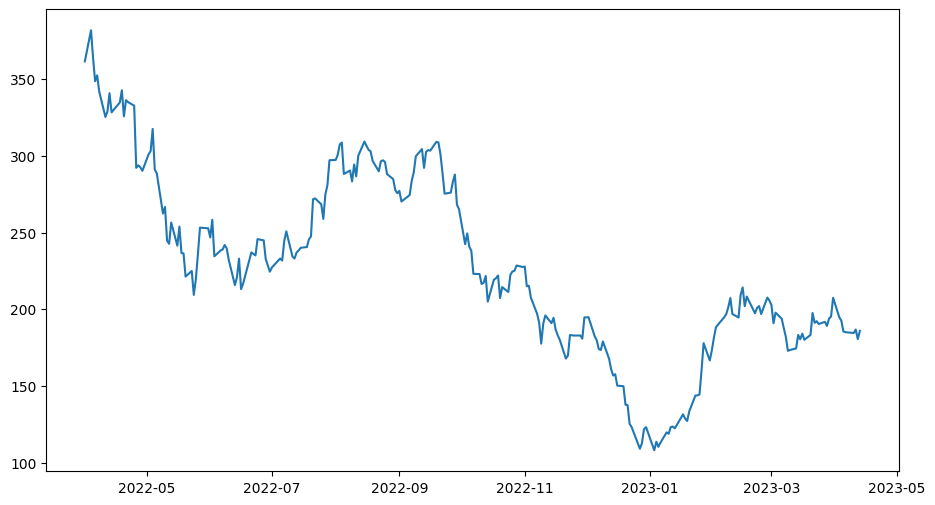

In [ ]:
plt.plot(ts2)

##2-2 Preprocessing

In [ ]:
# 결측치 처리
ts2[ts2.isna()]
# 없음

Series([], Name: Close, dtype: float64)

Date
2022-04-01    5.890345
2022-04-04    5.944941
2022-04-05    5.896476
2022-04-06    5.853887
2022-04-07    5.864824
                ...   
2023-04-06    5.220680
2023-04-10    5.217704
2023-04-11    5.229985
2023-04-12    5.195952
2023-04-13    5.225209
Name: Close, Length: 259, dtype: float64

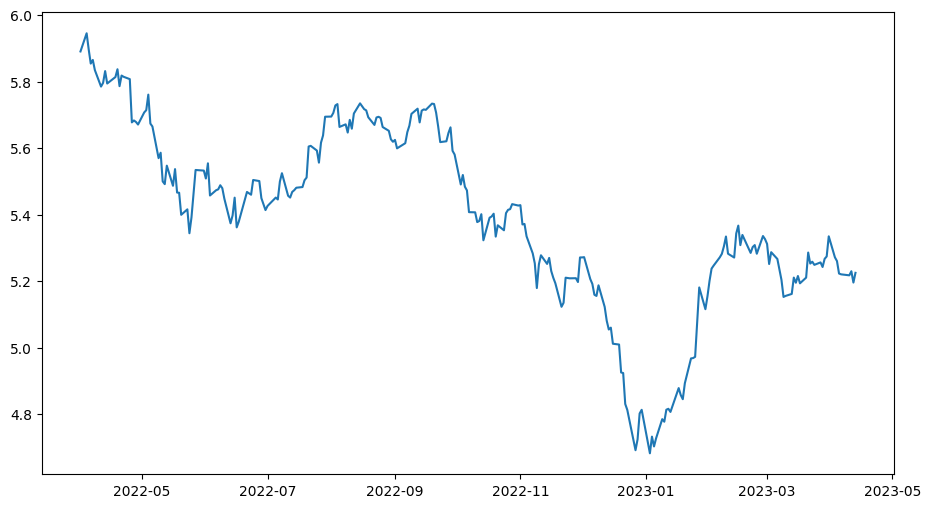

In [ ]:
#로그함수 변환
ts2_log = np.log(ts2)
plt.plot(ts2_log)
ts2_log

##2-3 ADF test 등
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [ ]:
# 데이터를 구간으로 잘라서 시각화

def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('<3')

<3


In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('<3')

<3


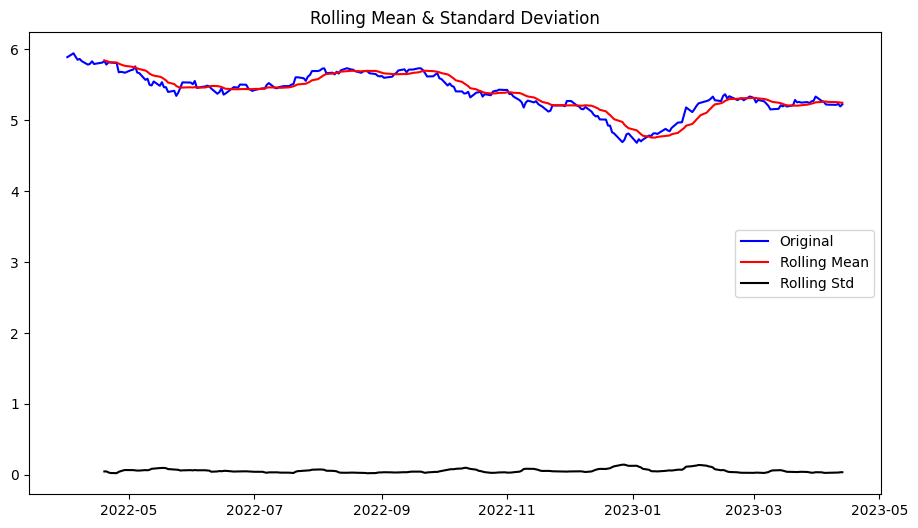

Results of Dickey-Fuller Test:
Test Statistic                  -2.099141
p-value                          0.244860
#Lags Used                       9.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [ ]:
# 정성적 그래프 분석
plot_rolling_statistics(ts2_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts2_log)




Results of Dickey-Fuller Test:
Test Statistic                -9.926971e+00
p-value                        2.889686e-17
#Lags Used                     4.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


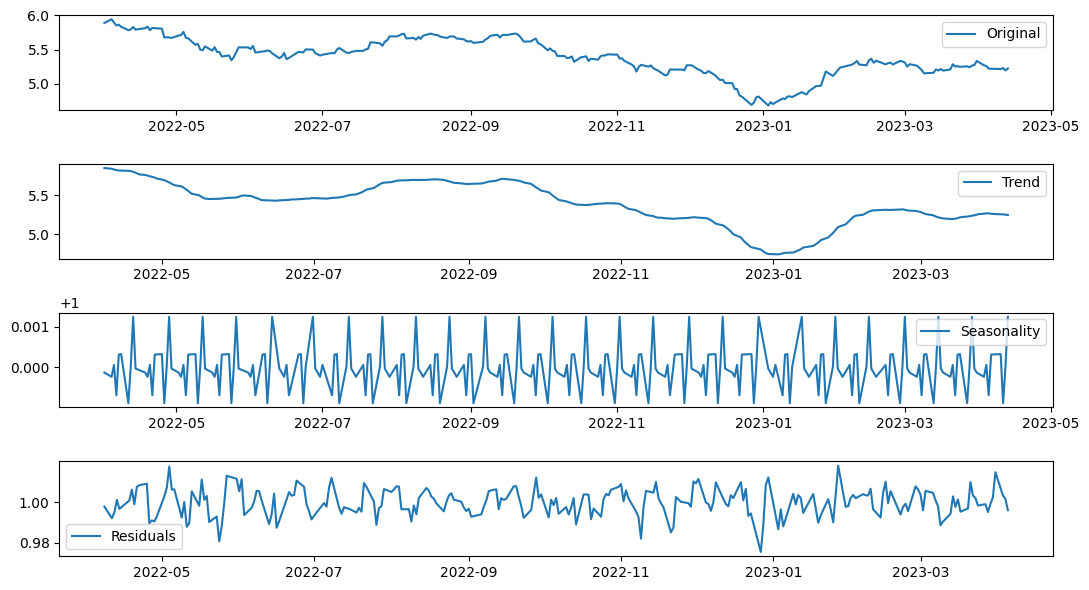

In [ ]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition2 = seasonal_decompose(ts2_log, model='multiplicative', period = 10) 

trend2 = decomposition2.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal2 = decomposition2.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual2 = decomposition2.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts2_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#정량적 Augmented Dicky-Fuller Test
residual2.dropna(inplace=True)
augmented_dickey_fuller_test(residual2)
#p-value 6.815460e-26

##2-4 Split

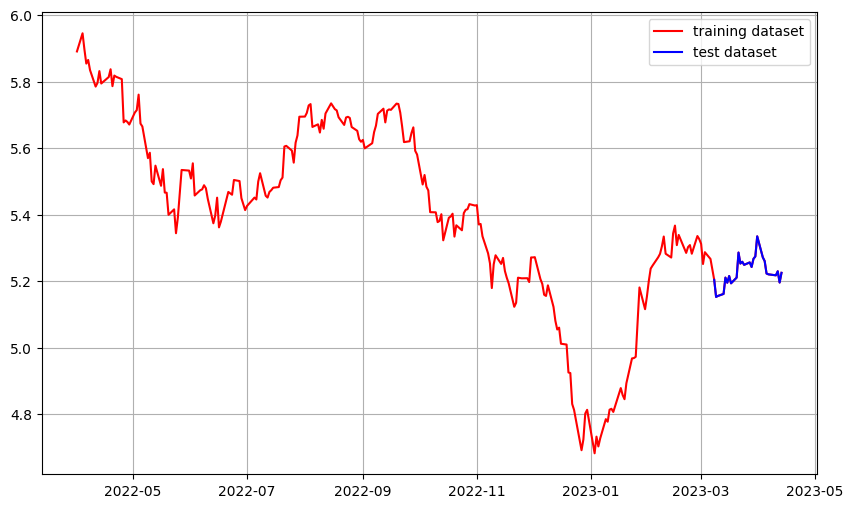

In [ ]:
train2_data, test2_data = ts2_log[:int(len(ts2_log)*0.9)], ts2_log[int(len(ts2_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts2_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test2_data, c='b', label='test dataset')
plt.legend()

##2-5 ARIMA parameter

###2-5-1 Determine p,d,q with graph
이들 중 p 와 q 는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데,   
이는 p 나 q 중 하나는 0이라는 뜻입니다.  
이렇게 하는 이유는 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문입니다.

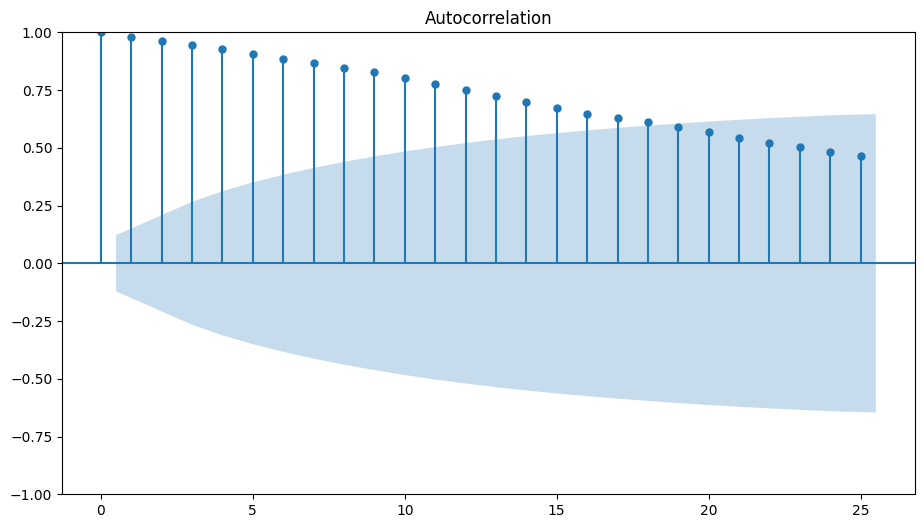

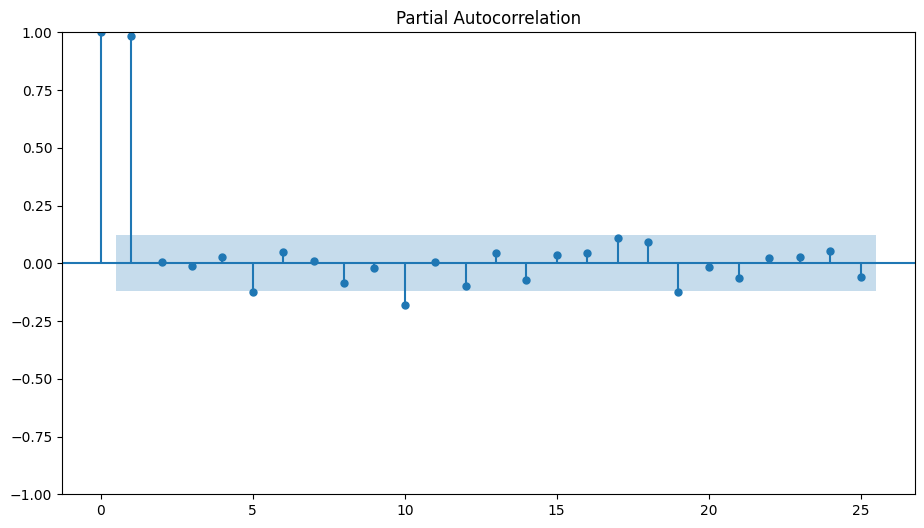

In [ ]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts2_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts2_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()
#ACF는 완만하게 감소, non-stationary 
#PACF는 lag 1 이후에 급격히 떨어지므로 p=1 그럼 q=0

Results of Dickey-Fuller Test:
Test Statistic                  -3.643922
p-value                          0.004975
#Lags Used                       8.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


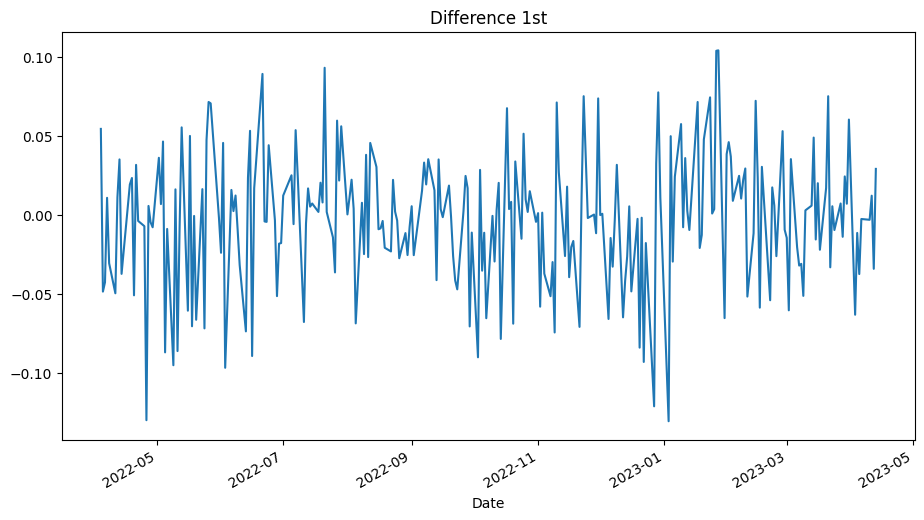

In [ ]:
# 1차 차분 구하기
diff2_1 = ts2_log.diff(periods=1).iloc[1:]
diff2_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff2_1)

#2차까지 필요한 거 같음

Results of Dickey-Fuller Test:
Test Statistic                -1.130673e+01
p-value                        1.267887e-20
#Lags Used                     7.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


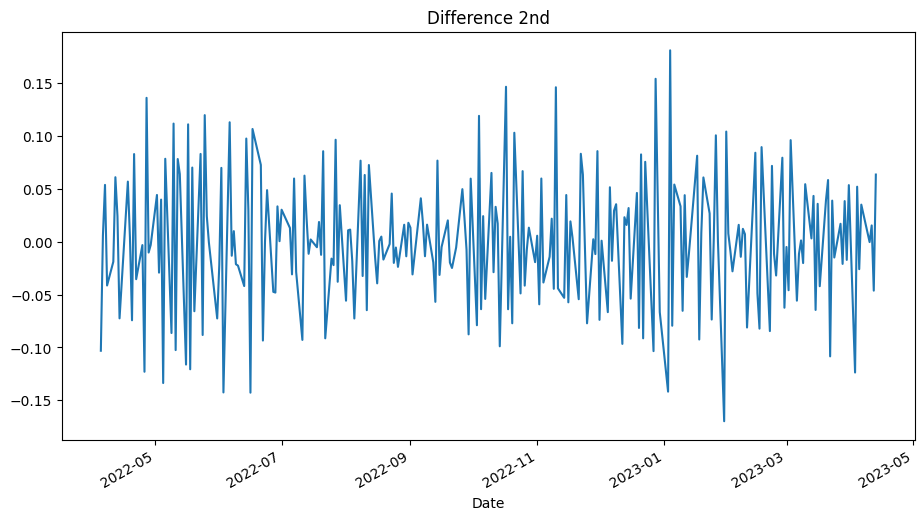

In [ ]:
# 2차 차분 구하기
diff2_2 = diff2_1.diff(periods=1).iloc[1:]
diff2_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff2_2)

#2차까지 필요한 거 같음

- p,d,q 구하기
    - 앞에서 PACF 그래프에서 lag 1 이후 값이 급격히 감소하여 p=1
    - 보통 p*q = 0이라 하였으니 q=0
    - 2차 차분까지 하면 p value가  더 작으므로 d=2

###2-5-2 Determine p,d,q with autoARIMA

In [ ]:
# !pip install arch

In [ ]:
# !pip install pmdarima

In [ ]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12  SARIMA
# 시즈널이 나왔다고 차분을 수동으로 하지 않고 모델에서 직접할 수 있군 여기서 1번만 했는데 대부분 1번만 하면 충분...
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm # Auto ARIMA 모델
model2 = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) 
res2 = model2.fit(train2_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-794.366, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-797.867, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-797.721, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-797.541, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-798.867, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-796.721, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.661 seconds


- determine p,d,q

||with graph|with autoARIMA|
|--|--|--|
|p,d,q|1,2,0|0,1,0|

##2-6 Learning

###2-6-1 ARIMA (1,2,0) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model2 = ARIMA(train2_data, order=(1, 2, 0)) # 모수는 이전 그래프를 참고 
fitted2_m = model2.fit() 

print(fitted2_m.summary())

# Ljung-Box 는 잔차가 백색 잡음인지 검정하는 통계량인데 
#그것의 통계값이 0.00 (귀무가설 : 잔차가 백색잡음 시계열을 따른다.) 이므로 기각
# 즉, 시계열 모형이 적합하지 않음. 당연히 예측이 엉망징창일 거임. 

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  233
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 353.550
Date:                Fri, 14 Apr 2023   AIC                           -703.099
Time:                        03:15:08   BIC                           -696.214
Sample:                             0   HQIC                          -700.322
                                - 233                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5660      0.053    -10.767      0.000      -0.669      -0.463
sigma2         0.0027      0.000     11.574      0.000       0.002       0.003
Ljung-Box (L1) (Q):                   8.10   Jarque-

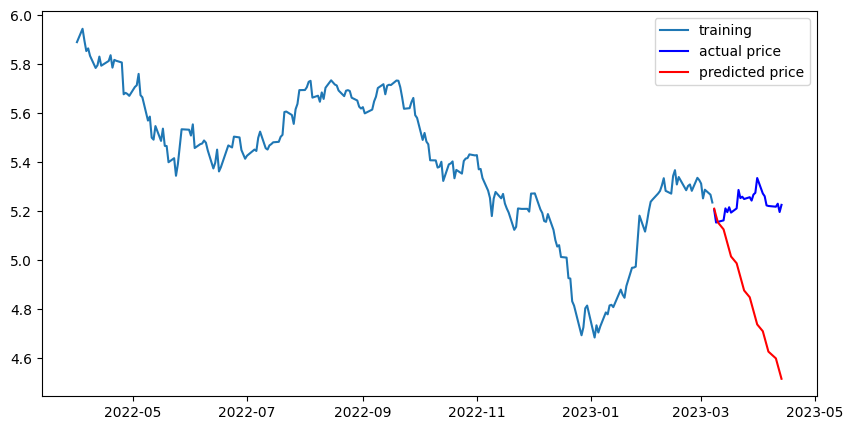

In [ ]:
fc = fitted2_m.forecast(len(test2_data), alpha=0.05) # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test2_data.index) # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train2_data, label='training')
plt.plot(test2_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test2_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test2_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test2_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test2_data))/np.abs(np.exp(test2_data)))
print('MAPE: {:.2f}%'.format(mape*100))

# 이게 무슨 일이야 헐.. 2차 차분은 안되나봐... 1차로 바꾸장 

MSE:  4026.3347085903424
MAE:  55.27445243928606
RMSE:  63.45340580765025
MAPE: 29.16%


###2-6-2 ARIMA (1,1,0) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model2 = ARIMA(train2_data, order=(1, 1, 0)) # 모수는 이전 그래프를 참고 
fitted2_m = model2.fit() 

print(fitted2_m.summary())

# Ljung-Box 는 잔차가 백색 잡음인지 검정하는 통계량인데 
#그것의 통계값이 0.99 (귀무가설 : 잔차가 백색잡음 시계열을 따른다.) 이므로 기각하지 못함. 
# 즉, 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기 상관을 가지지 않는 백색 잡음임.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  233
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 401.261
Date:                Fri, 14 Apr 2023   AIC                           -798.522
Time:                        03:21:01   BIC                           -791.629
Sample:                             0   HQIC                          -795.742
                                - 233                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0843      0.076     -1.116      0.265      -0.232       0.064
sigma2         0.0018      0.000     11.666      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.00   Jarque-

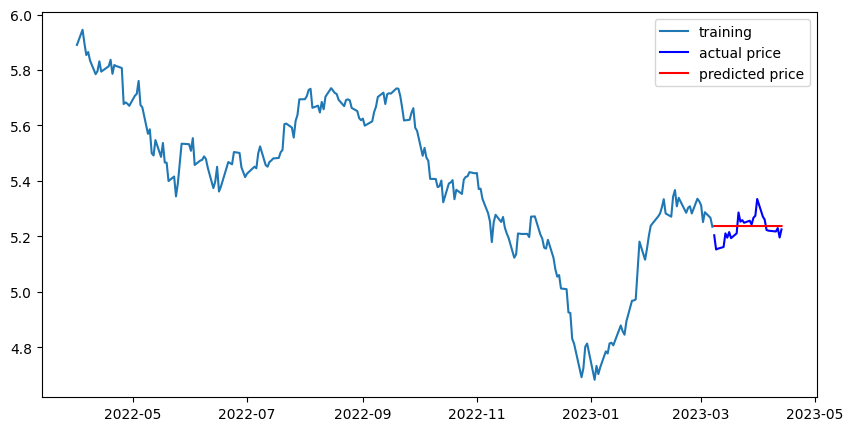

In [ ]:
fc = fitted2_m.forecast(len(test2_data), alpha=0.05) # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test2_data.index) # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train2_data, label='training')
plt.plot(test2_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test2_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test2_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test2_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test2_data))/np.abs(np.exp(test2_data)))
print('MAPE: {:.2f}%'.format(mape*100))

# 이게 무슨 일이야 헐.. 2차 차분은 안되나봐... 1차로 바꾸장 

MSE:  61.98308208576681
MAE:  6.411376899775292
RMSE:  7.872933512088541
MAPE: 3.45%


###2-6-3 ARIMA (0,1,0) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model2 = ARIMA(train2_data, order=(0, 1, 0)) # 모수는 autoARIMA 참고
fitted2_m = model2.fit() 

print(fitted2_m.summary())

# Ljung-Box 는 잔차가 백색 잡음인지 검정하는 통계량인데 
#그것의 통계값이 0.17 (귀무가설 : 잔차가 백색잡음 시계열을 따른다.) 이므로 기각하지 못함. 
# 즉, 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기 상관을 가지지 않는 백색 잡음임.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  233
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 400.433
Date:                Fri, 14 Apr 2023   AIC                           -798.867
Time:                        03:24:14   BIC                           -795.420
Sample:                             0   HQIC                          -797.477
                                - 233                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0019      0.000     11.575      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   1.86   Jarque-Bera (JB):                 3.91
Prob(Q):                              0.17   Pr

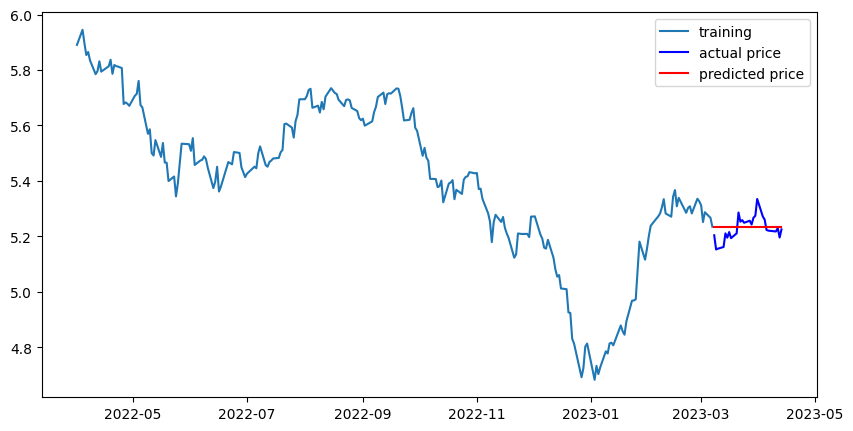

In [ ]:
fc = fitted2_m.forecast(len(test2_data), alpha=0.05) # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test2_data.index) # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train2_data, label='training')
plt.plot(test2_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test2_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test2_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test2_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test2_data))/np.abs(np.exp(test2_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  60.967585815027206
MAE:  6.338079599233762
RMSE:  7.808174294611206
MAPE: 3.41%


##2-7 Summary
- p,d,q

||with graph|d=1|with autoARIMA|
|--|--|--|--|
|p,d,q|1,2,0|1,1,0|0,1,0|
|AIC|-703.099|-798.522|-798.867|
|MAPE(%)|29.16|3.45|3.41|

- 그래프로 1,2,0을 정했는데 이게 왠걸 MAPE가 너무 높아 차분은 대부분 1차만 하면 된다고 하더니 진짜인가 봄.
- 그래서 차분을 1로 했더니 역시나 좋은 값을 얻을 수 있었고 autoarima로 구한 값이 조금 더 좋았음. 
- Ljung-Box의 p 값이 잔차가 백색잠음 시계열을 따른다라는 귀무 가설을 기각할 정도는 아니지만 0.17이면 많이 작아 residual의 백색잡음의 정도가 작다고 생각했는데 아닌가 봄. MAPE가 작게 나왔음. (0,1,0의 경우)


# SK 이노베이션

##3-1 Import Data
- 종가 Close만 사용
- 데이터 프레임을 시리즈로

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams



In [ ]:
import yfinance as yf
# path = '/content/drive/MyDrive/Colab Notebooks/aiffel/Time_series(7주차)/'
df = yf.download('096770.KS', start = '2020-01-01')
# df.to_csv(path + 'skinno.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/Colab Notebooks/aiffel/Time_series(7주차)/'
# df = pd.read_csv(path+'skinno.csv', index_col = 'Date', parse_dates = True)
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2020-01-02    146500.0
2020-01-03    149500.0
2020-01-06    148000.0
2020-01-07    144500.0
2020-01-08    137000.0
Name: Close, dtype: float64

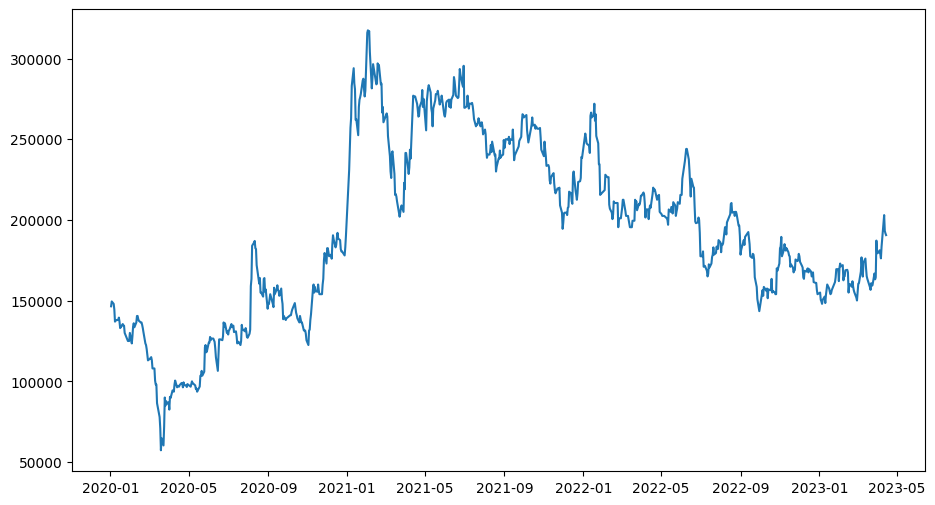

In [ ]:
plt.plot(ts)

##3-2 Preprocessing

In [ ]:
# 결측치 처리
ts[ts.isna()]
# 없음

Series([], Name: Close, dtype: float64)

Date
2020-01-02    11.894781
2020-01-03    11.915052
2020-01-06    11.904968
2020-01-07    11.881035
2020-01-08    11.827736
                ...    
2023-04-10    12.194506
2023-04-11    12.220961
2023-04-12    12.171481
2023-04-13    12.163687
2023-04-14    12.157932
Name: Close, Length: 812, dtype: float64

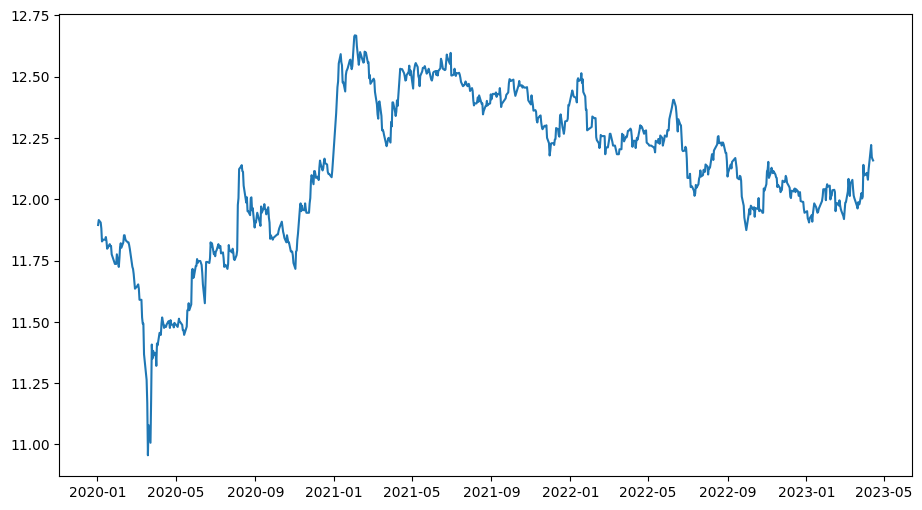

In [ ]:
#로그함수 변환
ts_log = np.log(ts)
plt.plot(ts_log)
ts_log

##3-3 ADF test 등
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [ ]:
# 데이터를 구간으로 잘라서 시각화

def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('<3')

<3


In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('<3')

<3


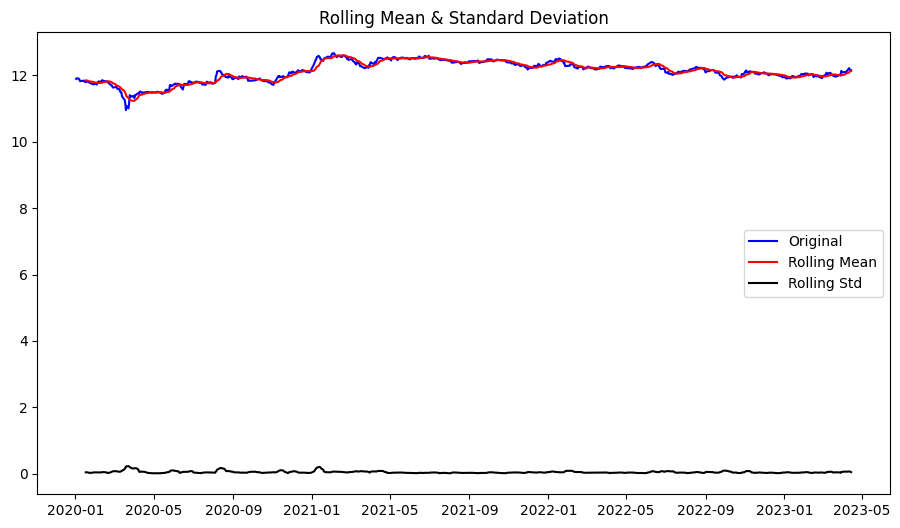

Results of Dickey-Fuller Test:
Test Statistic                  -1.919850
p-value                          0.322781
#Lags Used                      11.000000
Number of Observations Used    800.000000
Critical Value (1%)             -3.438551
Critical Value (5%)             -2.865160
Critical Value (10%)            -2.568697
dtype: float64


In [ ]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)



Results of Dickey-Fuller Test:
Test Statistic                -8.965246e+00
p-value                        8.021917e-15
#Lags Used                     1.100000e+01
Number of Observations Used    7.700000e+02
Critical Value (1%)           -3.438871e+00
Critical Value (5%)           -2.865301e+00
Critical Value (10%)          -2.568773e+00
dtype: float64


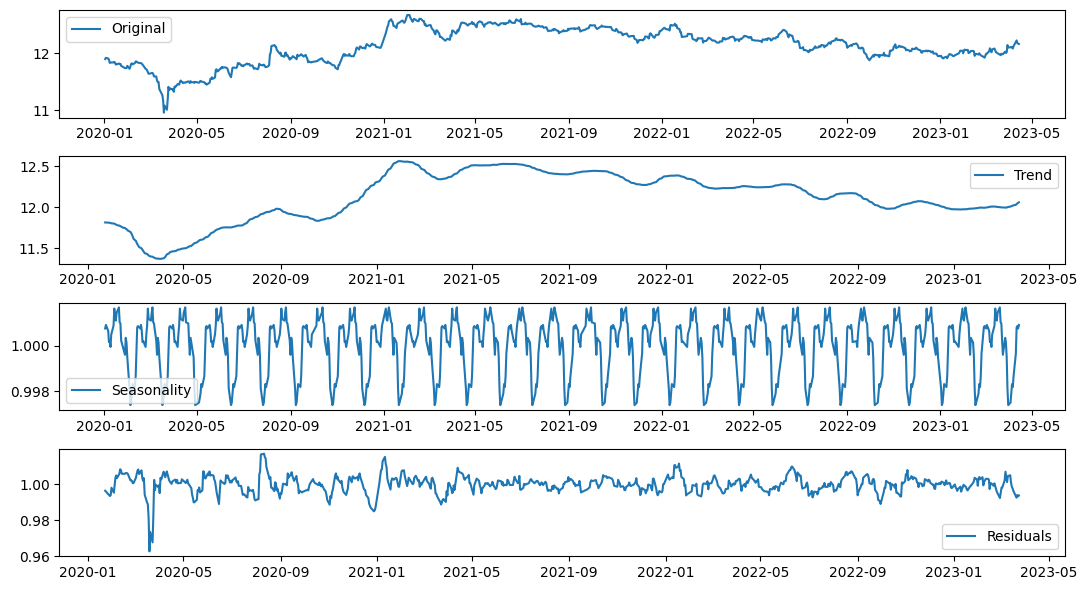

In [ ]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#정량적 Augmented Dicky-Fuller Test
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)
#p-value 6.135123e-26

##3-4 Split

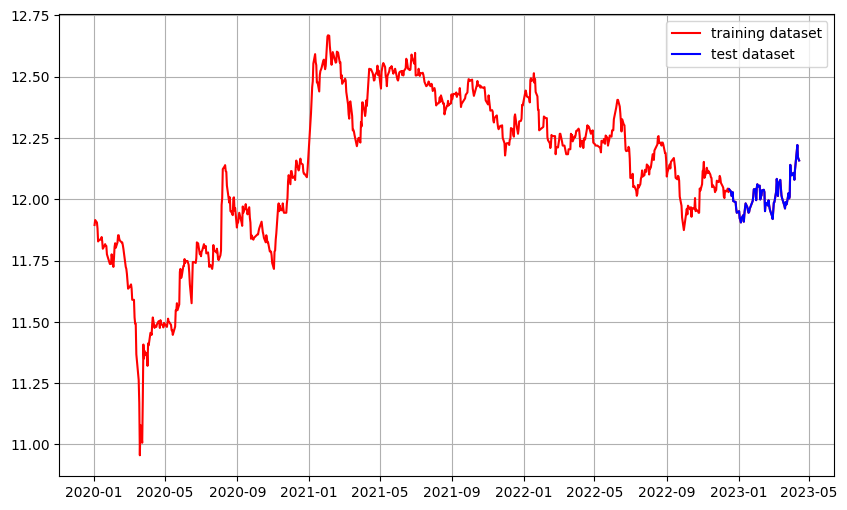

In [ ]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

##3-5 ARIMA parameter

###3-5-1 Determine p,d,q with graph
이들 중 p 와 q 는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데,   
이는 p 나 q 중 하나는 0이라는 뜻입니다.  
이렇게 하는 이유는 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문입니다.

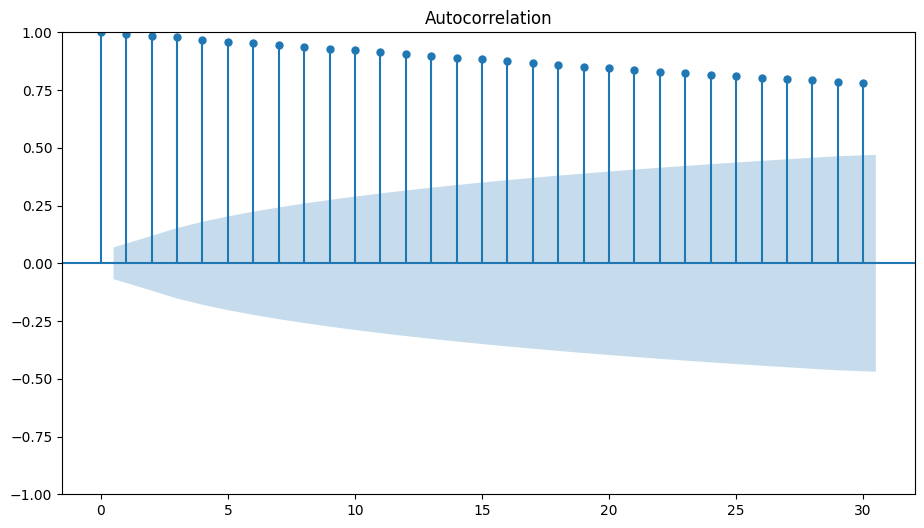

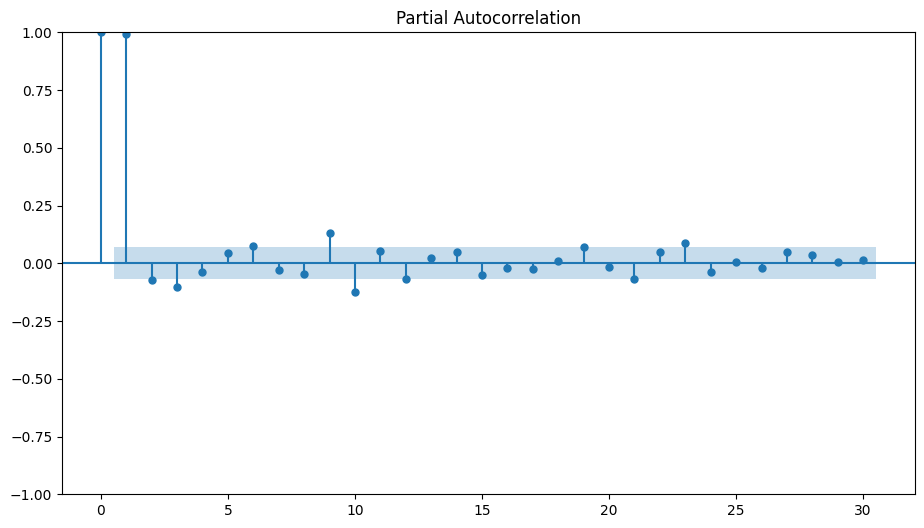

In [ ]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()
#ACF는 완만하게 감소, non-stationary 
#PACF는 lag 1 이후에 급격히 떨어지므로 p=1 그럼 q=0

Results of Dickey-Fuller Test:
Test Statistic                -9.287259e+00
p-value                        1.206084e-15
#Lags Used                     9.000000e+00
Number of Observations Used    8.010000e+02
Critical Value (1%)           -3.438540e+00
Critical Value (5%)           -2.865155e+00
Critical Value (10%)          -2.568695e+00
dtype: float64


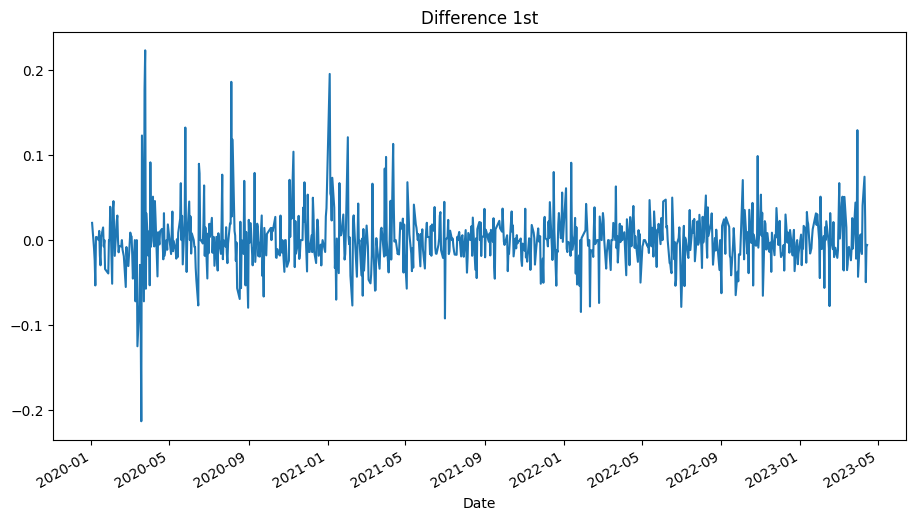

In [ ]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)



#1차까지 

Results of Dickey-Fuller Test:
Test Statistic                -1.130291e+01
p-value                        1.294207e-20
#Lags Used                     1.800000e+01
Number of Observations Used    7.910000e+02
Critical Value (1%)           -3.438644e+00
Critical Value (5%)           -2.865201e+00
Critical Value (10%)          -2.568719e+00
dtype: float64


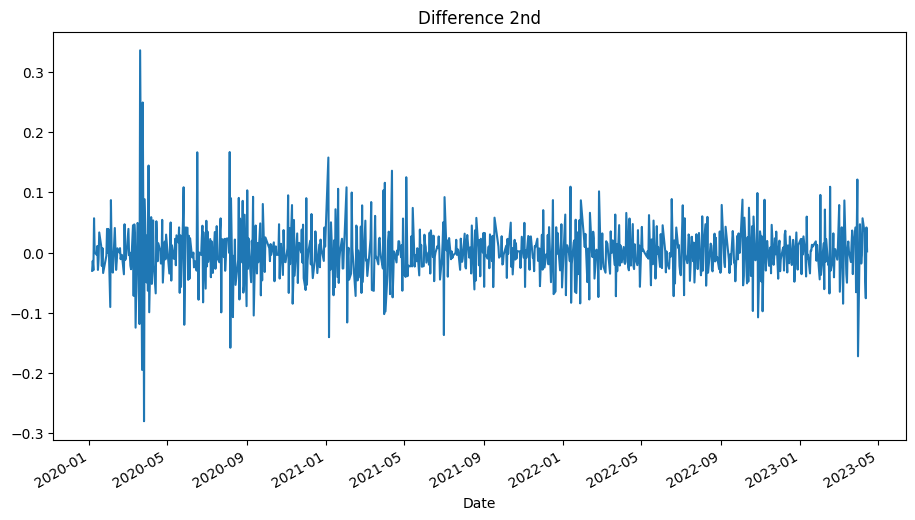

In [ ]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- p,d,q 구하기
    - 앞에서 PACF 그래프에서 lag 1 이후 값이 급격히 감소하여 p=1
    - 보통 p*q = 0이라 하였으니 q=0
    - 1차 차분을 하였더니 p value가 충분히 작으므로 d=1

###3-5-2 Determine p,d,q with autoARIMA

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12  SARIMA
# 시즈널이 나왔다고 차분을 수동으로 하지 않고 모델에서 직접할 수 있군 여기서 1번만 했는데 대부분 1번만 하면 충분...
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm # Auto ARIMA 모델
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) #seasonal 이 보이니깐 true
res = model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2828.085, Time=3.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2820.331, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2822.041, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2821.373, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2822.311, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2827.176, Time=5.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2826.215, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2825.137, Time=2.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2825.582, Time=9.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2823.722, Time=2.98 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2824.729, Time=2.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2824.276, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2823.102, Time=9.32 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-2830.093, Time=3.22 sec
 ARIMA(1,1,2)(0,0,0

- determine p,d,q

||with graph|with autoARIMA|
|--|--|--|
|p,d,q|1,1,0|2,1,2|

##3-6 Learning

###3-6-1 ARIMA (1,1,0) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

# Ljung-Box 는 잔차가 백색 잡음인지 검정하는 통계량인데 
#그것의 통계값이 0.84 (귀무가설 : 잔차가 백색잡음 시계열을 따른다.) 이므로 기각하지 못함. 
# 즉, 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기 상관을 가지지 않는 백색 잡음임.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  730
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1414.012
Date:                Fri, 14 Apr 2023   AIC                          -2824.024
Time:                        03:54:29   BIC                          -2814.840
Sample:                             0   HQIC                         -2820.480
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0713      0.020      3.545      0.000       0.032       0.111
sigma2         0.0012   3.05e-05     39.604      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.04   Jarque-

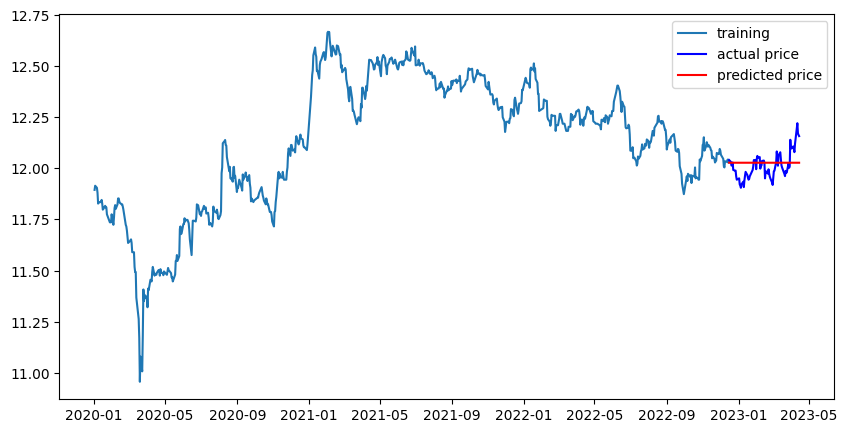

In [ ]:
fc = fitted_m.forecast(len(test_data), alpha=0.05) # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index) # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  134159482.54364544
MAE:  9171.89438630875
RMSE:  11582.723451056123
MAPE: 5.52%


###3-6-2 ARIMA (0,1,0) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(train_data, order=(2, 1, 2)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

# Ljung-Box 는 잔차가 백색 잡음인지 검정하는 통계량인데 
#그것의 통계값이 0.58 (귀무가설 : 잔차가 백색잡음 시계열을 따른다.) 이므로 기각하지 못함. 
# 즉, 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기 상관을 가지지 않는 백색 잡음임.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  730
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1420.047
Date:                Fri, 14 Apr 2023   AIC                          -2830.093
Time:                        03:55:56   BIC                          -2807.135
Sample:                             0   HQIC                         -2821.235
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2940      0.130      2.266      0.023       0.040       0.548
ar.L2         -0.6382      0.122     -5.253      0.000      -0.876      -0.400
ma.L1         -0.2511      0.121     -2.069      0.0

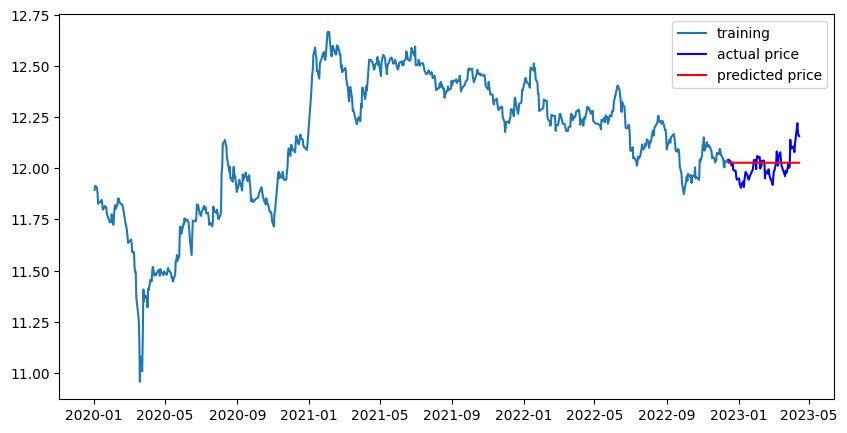

In [ ]:
fc = fitted_m.forecast(len(test_data), alpha=0.05) # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index) # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  134173652.25755385
MAE:  9174.362580712212
RMSE:  11583.33510943864
MAPE: 5.52%


##3-7 Summary
- p,d,q

||with graph|with autoARIMA|
|--|--|--|
|p,d,q|1,1,0|2,1,2|
|AIC|-2824.024|-2830.093|
|MAPE(%)|5.52|5.52|



# Review
- 귀무가설의 채택, 기각의 기준 p 값에 대해 알아볼 필요가 있음. 
- 그래프와 오토아리마를 통한 파라미터를 각각 구해봤는데 많이 차이는 안난 거 같음.
- 1차 차분만이면 충분한 데이터 들이었는데 더 차분하면 좋은 데이터는 어떤 모양인지 궁금함.
- 데이터를 많이 모으면 모을 수록 좋다고 하는데 주식 데이터는 오랜 기간 (예를 들면 5년 이상) 의 데이터는 더 예측을 못함. 코로나를 지나면서 시장의 상황이 급격히 달라졌기 때문에 이전 데이터는 지금을 예측하는데 도움이 안되는 거 같음.
- 데이터의 그래프를 봐도 변곡점이 있음. 그렇다면 변곡점이 없는 다른 변수가 들어가지 않는 많은 사람들의 주목을 받지 못하는 종목은 예측이 더 잘 될까?